# Encoding Categorical Data

In [36]:
import pandas as pd
import numpy as np

## Simple data frame with categorical data
Represent each category as an integer. Trouble is, the meaning of each integer is specific to each feature, so the 1 in 'feature 1' does not mean the same thing as the one in 'feature 2'.



In [27]:
data = pd.DataFrame(data=[[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]], columns=['feature 1',  'feature 2', 'feature 3'])
data

,feature 1,feature 2,feature 3
0,0,0,3
1,1,1,0
2,0,2,1
3,1,0,2


Also create a dataframe of strings to make this a little more intuitive

In [195]:
gender = 'male', 'female'
country = 'France', 'UK', 'Germany'
color = 'blue', 'red', 'green', 'purple'

In [196]:
df = data.copy()
for i, category in enumerate([gender, country, color]):
    df.iloc[:,i] = data.iloc[:,i].apply(lambda j: category[j])
df.columns = ['gender', 'country', 'color']

df

,gender,country,color
0,male,France,purple
1,female,UK,blue
2,male,Germany,red
3,female,France,green


# Label Encoder


In [197]:
from sklearn.preprocessing import LabelEncoder


## Transform categories into integers in one go
Not very convenient because we need to unravel the dataframe values. Does not generalise to cases where the data contains non-categorical values.

In [198]:
le = LabelEncoder()
le.fit(gender + country + color)
print(le.classes_)
values_t = le.transform(df.values.ravel()).reshape(df.shape)
values_t

['France' 'Germany' 'UK' 'blue' 'female' 'green' 'male' 'purple' 'red']


array([[6, 0, 7],
       [4, 2, 3],
       [6, 1, 8],
       [4, 0, 5]])

In [199]:
df_t = pd.DataFrame(data=values_t, columns=[c + '(int)' for c in df.columns])
df_t

,gender(int),country(int),color(int)
0,6,0,7
1,4,2,3
2,6,1,8
3,4,0,5


## Transform categories into integers using LabelEncoder


In [201]:
labenc_lst = []
df_t2 = df.copy()
for category in df.columns:
    le2 = LabelEncoder()
    df_t2[category] = le2.fit_transform(df[category])
    labenc_lst.append(le2)

df_t2

,gender,country,color
0,1,0,2
1,0,2,0
2,1,1,3
3,0,0,1


Note that the Label Encoder is not appropriate for regressions and similar techniques that compute the distance between samples. For example, the distance between 'red' and 'blue' is 3 in our case, whereas the distance between 'purple' and 'red' is 1. This would have an 'unphysical' effect on regression models. To avoid this, use the One Hot Encoder. The drawback of the one hot encoder is that it increases the number of features. 

Some algorithms, such as decision trees (e.g. random forests), do not use the pairwise distance so can be used in combination with Label Encoder.
See http://stackoverflow.com/questions/17469835/one-hot-encoding-for-machine-learning for more discussion.

# One Hot Encoder
Transforms a feature with N integer categories into N boolean category features (does this sample belong to this category or not?).

## We can get the number of categories in each column
Thus, we see that we've got 9 different categories, so that our 4x3 dataset is actually a 4x9 dataset, where each feature is represented as a boolean (0 or 1). 

In [162]:
enc.n_values_

array([2, 3, 4])

## The categories in each column are mapped using the `feature_indices_` attribute
The categories in column `i` are mapped to `range(feature_indices_[i], feature_indices_[i+1])`

In [163]:
enc.feature_indices_

array([0, 2, 5, 9])

## Each categorical feature is mapped to multiple boolean columns

In [164]:
mapping = {data.columns[i]: list(range(enc.feature_indices_[i], enc.feature_indices_[i+1]))
           for i in range(data.shape[1])}
mapping

{'feature 1': [0, 1], 'feature 2': [2, 3, 4], 'feature 3': [5, 6, 7, 8]}

So our feature 1 will be transformed into two columns of booleans, (0 or 1), our feature 2 into 3 columns, and our feature 3 into 4 columns. The new columns are listed in the `active_features_` attribute of our encoder

In [165]:
enc.active_features_

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## Transforming samples
This shows how a single sample in our original dataset is transformed into a new sample by our OneHot encoder.

In [166]:
def make_dataframe(sample, columns, **kwargs):
    return pd.DataFrame(data=sample, columns=columns, **kwargs)
original_features = 'feature 1', 'feature 2', 'feature 3'
new_features = ['category ' + str(i) for i in enc.active_features_]

x1 = make_dataframe([[0, 0, 0]], original_features)
x1

,feature 1,feature 2,feature 3
0,0,0,0


In [167]:
x1_t = enc.transform(x1)
make_dataframe(x1_t, new_features)

,category 0,category 1,category 2,category 3,category 4,category 5,category 6,category 7,category 8
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [168]:
make_dataframe(x1_t, new_features, dtype='bool')

,category 0,category 1,category 2,category 3,category 4,category 5,category 6,category 7,category 8
0,True,False,True,False,False,True,False,False,False


In [169]:
x2 = make_dataframe([[1,1,1]], original_features)
x2

,feature 1,feature 2,feature 3
0,1,1,1


In [170]:
x2_t = make_dataframe(enc.transform(x2), new_features)
x2_t

,category 0,category 1,category 2,category 3,category 4,category 5,category 6,category 7,category 8
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Transforming multiple samples

In [171]:
data_t = make_dataframe(enc.transform(data), new_features, dtype=bool)

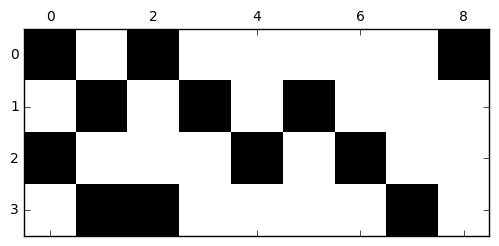

In [172]:
import matplotlib.pyplot as plt
plt.spy(data_t)